<a href="https://colab.research.google.com/github/HansHenseler/masdav2023/blob/main/Part_9_Analysing_and_visualising_geolocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing and visualising geolocation data

Part 9

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2023

# Part 9

Importing libraries

In [ ]:
# Need to install various packages.
#
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas
# Install descartes - Geopandas requirment
#!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (6,965 kB/s)
Selecting previously unselected

## 1 Reading Geographic data
Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly_express as px

In [ ]:
# get demo data

!git clone --recursive https://github.com/shakasom/GDS.git

Cloning into 'GDS'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (39/39), done.


In [ ]:
# We have zipped data so let us unzip it
!unzip GDS/dataset/1-introData.zip

Archive:  GDS/dataset/1-introData.zip
   creating: 1-introData/
  inflating: 1-introData/cities.geojson  
  inflating: 1-introData/countries.gpkg  
  inflating: 1-introData/rivers.gpkg  


In [ ]:
# Read the data

# 1. Read Countries --> Geopackage Format
file = '1-introData/countries.gpkg'
countries = gpd.read_file(file)
countries.shape

(253, 11)

In [ ]:
# so we have 253 countries. Here are the first 5:

countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [ ]:
ch_country = countries.loc[countries['NAME']=='Switzerland']
ch_country

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe,"MULTIPOLYGON (((10.45381 46.86443, 10.44854 46..."


In [ ]:
# 2. Read Cities --> Geojson Format

cities = gpd.read_file('1-introData/cities.geojson')

In [ ]:
# Explore cities data
cities.shape

(7343, 9)

In [ ]:
biel_city = cities.loc[cities['name']=='Biel']
biel_city

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
922,Biel,0.0,0,47.16659,7.250038,78708,48614,0,POINT (7.25004 47.16659)


## 2 Making maps

In [ ]:
from geopandas.tools import sjoin

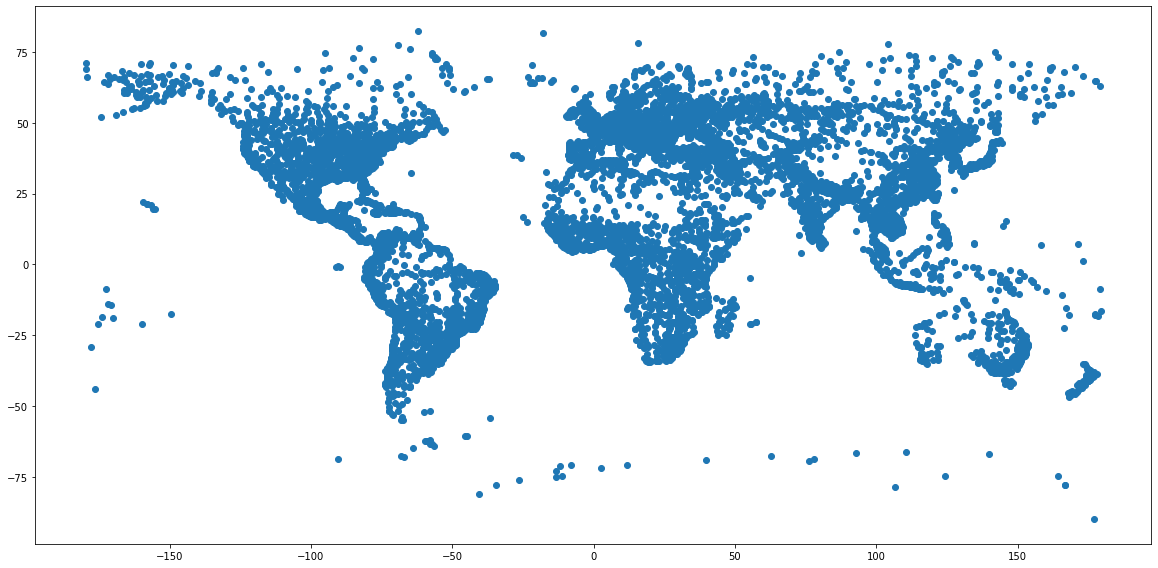

In [ ]:
cities.plot(figsize=(20,20))

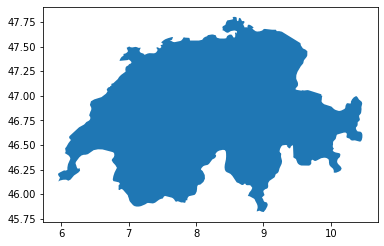

In [ ]:
ch_country.plot()



In [ ]:
# make cities coordinate reference system same as country crs

cities.crs = ch_country.crs

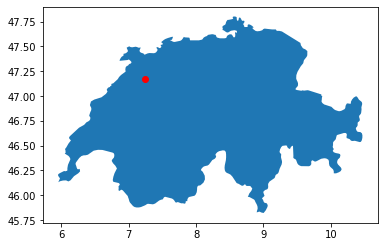

In [ ]:
ax = ch_country.plot()
biel_city.plot(ax=ax,color='red')

## 3 Spatial join

In [ ]:
# now join cities and ch_countries to get all cities in Switzerlands

ch_cities = sjoin(cities, ch_country, how="inner")
ch_cities.shape

(28, 20)

In [ ]:
ch_cities.tail()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry,index_right,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT
2549,Lausanne,0.0,0,46.530427,6.650023,265702,116751,250481,POINT (6.65002 46.53043),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
2550,Basel,0.0,0,47.580389,7.590017,830000,170635,559750,POINT (7.59002 47.58039),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
6493,Bern,0.0,0,46.916683,7.466975,275329,121631,267814,POINT (7.46698 46.91668),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
7182,Zürich,1.0,1,47.379988,8.550010,1108000,341730,779877,POINT (8.54806 47.38193),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
7286,Geneva,1.0,0,46.210008,6.140028,1240000,192385,508284,POINT (6.14003 46.21001),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe


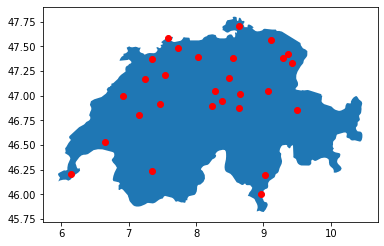

In [ ]:
ax = ch_country.plot()
ch_cities.plot(ax=ax,color='red')

## 4 Plotting IP addresses

In [ ]:
import socket
import requests
import json

def get_info(ip):
    """This function calls the api and return the response"""
    my_api_key= 'a5af1c0bc39b4df29321df364a2b71e8'
    url =f"https://api.ipgeolocation.io/ipgeo?apiKey={my_api_key}&ip={ip}"
    headers = {
        'accept': "application/json",
        'content-type': "application/json"
        }
    response = requests.request("GET", url, headers=headers)
    respond = json.loads(response.text)
    return respond

In [ ]:
bfh = 'www.bfh.ch'
bfh_ip = socket.gethostbyname(bfh)
bfh_info = get_info(bfh_ip)
bfh_info

{'ip': '94.230.211.116',
 'continent_code': 'EU',
 'continent_name': 'Europe',
 'country_code2': 'CH',
 'country_code3': 'CHE',
 'country_name': 'Switzerland',
 'country_capital': 'Bern',
 'state_prov': 'Zurich',
 'district': 'Zurich',
 'city': 'Zurich',
 'zipcode': '8004',
 'latitude': '47.37315',
 'longitude': '8.52836',
 'is_eu': False,
 'calling_code': '+41',
 'country_tld': '.ch',
 'languages': 'de-CH,fr-CH,it-CH,rm',
 'country_flag': 'https://ipgeolocation.io/static/flags/ch_64.png',
 'geoname_id': '6295499',
 'isp': 'Nine Internet Solutions AG',
 'connection_type': '',
 'organization': 'RIPE Network Coordination Centre',
 'currency': {'code': 'CHF', 'name': 'Swiss Franc', 'symbol': 'CHF'},
 'time_zone': {'name': 'Europe/Zurich',
  'offset': 1,
  'current_time': '2022-08-24 23:26:19.176+0200',
  'current_time_unix': 1661376379.176,
  'is_dst': True,
  'dst_savings': 1}}

In [ ]:
sbb = 'www.sbb.ch'
sbb_info = get_info(socket.gethostbyname(sbb))
sbb_info

{'ip': '194.150.245.142',
 'continent_code': 'EU',
 'continent_name': 'Europe',
 'country_code2': 'CH',
 'country_code3': 'CHE',
 'country_name': 'Switzerland',
 'country_capital': 'Bern',
 'state_prov': 'Berne',
 'district': 'Ostermundigen',
 'city': 'Ostermundigen',
 'zipcode': '3072',
 'latitude': '46.95716',
 'longitude': '7.48300',
 'is_eu': False,
 'calling_code': '+41',
 'country_tld': '.ch',
 'languages': 'de-CH,fr-CH,it-CH,rm',
 'country_flag': 'https://ipgeolocation.io/static/flags/ch_64.png',
 'geoname_id': '10396526',
 'isp': 'Schweizerische Bundesbahnen SBB',
 'connection_type': '',
 'organization': 'Schweizerische Bundesbahnen SBB',
 'currency': {'code': 'CHF', 'name': 'Swiss Franc', 'symbol': 'CHF'},
 'time_zone': {'name': 'Europe/Zurich',
  'offset': 1,
  'current_time': '2022-08-24 23:26:19.546+0200',
  'current_time_unix': 1661376379.546,
  'is_dst': True,
  'dst_savings': 1}}

In [ ]:
elite = 'elite-biel.com'
hotel_info = get_info(socket.gethostbyname(elite))
hotel_info

{'ip': '94.126.23.52',
 'continent_code': 'EU',
 'continent_name': 'Europe',
 'country_code2': 'CH',
 'country_code3': 'CHE',
 'country_name': 'Switzerland',
 'country_capital': 'Bern',
 'state_prov': 'Aargau',
 'district': '',
 'city': '',
 'zipcode': '',
 'latitude': '47.39181',
 'longitude': '8.04999',
 'is_eu': False,
 'calling_code': '+41',
 'country_tld': '.ch',
 'languages': 'de-CH,fr-CH,it-CH,rm',
 'country_flag': 'https://ipgeolocation.io/static/flags/ch_64.png',
 'geoname_id': '9256881',
 'isp': 'METANET AG',
 'connection_type': '',
 'organization': 'METANET AG',
 'currency': {'code': 'CHF', 'name': 'Swiss Franc', 'symbol': 'CHF'},
 'time_zone': {'name': 'Europe/Zurich',
  'offset': 1,
  'current_time': '2022-08-24 23:26:19.877+0200',
  'current_time_unix': 1661376379.877,
  'is_dst': True,
  'dst_savings': 1}}

In [ ]:
# Convert this geolocation data into a geodataframe. First we make a dataframe

lst = { 'Hostname':[sbb,bfh,elite],
        'Latitude':[sbb_info['latitude'],bfh_info['latitude'],hotel_info['latitude']],
        'Longitude':[sbb_info['longitude'],bfh_info['longitude'],hotel_info['longitude']]}

# Calling DataFrame constructor on list
df = pd.DataFrame(lst)
df

,Hostname,Latitude,Longitude
0,www.sbb.ch,46.95716,7.48300
1,www.bfh.ch,47.37315,8.52836
2,elite-biel.com,47.39181,8.04999


In [ ]:
# then we convert the dataframe into a GeoDataFrame

host_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
host_gdf.head()

,Hostname,Latitude,Longitude,geometry
0,www.sbb.ch,46.95716,7.48300,POINT (7.48300 46.95716)
1,www.bfh.ch,47.37315,8.52836,POINT (8.52836 47.37315)
2,elite-biel.com,47.39181,8.04999,POINT (8.04999 47.39181)


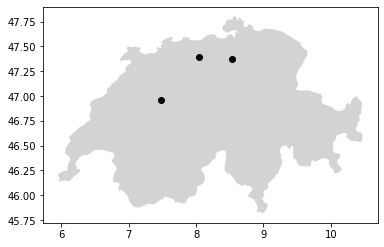

In [ ]:
host_gdf.crs = ch_country.crs
ax = ch_country.plot(color='lightgrey')
host_gdf.plot(ax=ax,color='black')

## 5 Open streetmap

In [ ]:
# folium maps combine geodataframaes and maps from, e.g., Openstreetmap
#
# here is an introduction : https://geopandas.readthedocs.io/en/latest/gallery/plotting_with_folium.html
#
map = folium.Map(location = [host_gdf.geometry[0].xy[1][0],host_gdf.geometry[0].xy[0][0]], tiles='OpenStreetMap' , width='75%',height='75%',zoom_start = 8)

# Create a geometry list from the GeoDataFrame
host_gdf_list = [[point.xy[1][0], point.xy[0][0]] for point in host_gdf.geometry ]

# Iterate through list and add a marker for each host in host_gdf
i = 0
for coordinates in host_gdf_list:
    map.add_child(folium.Marker(location = coordinates,popup=host_gdf.Hostname[i]))
    i = i + 1

map

## 6 Extracting geolocation from pictures

In [ ]:
import PIL.Image

from google.colab import drive
drive.mount('/content/gdrive')

picture = '/content/gdrive/MyDrive/Testdata/20200701_114126_small.jpg'
img = PIL.Image.open(picture)
exif_data = img._getexif()
exif_data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


{36864: b'0220',
 37121: b'\x01\x02\x03\x00',
 37377: (955, 100),
 36867: '2020:07:01 11:41:26',
 36868: '2020:07:01 11:41:26',
 37378: (153, 100),
 37379: (728, 100),
 37380: (0, 10),
 37381: (153, 100),
 37383: 2,
 37385: 0,
 37386: (420, 100),
 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 40961: 1,
 40962: 4032,
 41990: 0,
 37520: '0067',
 37521: '0067',
 37522: '0067',
 40963: 1960,
 271: 'samsung',
 272: 'SM-G955F',
 274: 1,
 531: 1,
 33434: (1, 750),
 40965: 898,
 282: (72, 1),
 33437: (17, 10),
 41729: b'\x01\x00\x00\x00',
 59933: -54,
 42016: 'F12LLJA00SM F12LLKL01GM\n',
 283: (72, 1),
 34850: 2,
 34853: {0: b'\x02\x02\x00\x00',
  1: 'N',
  2: ((47, 1), (20, 1), (16, 1)),
  3: 'E',
  4: ((11, 1), (50, 1), (8, 1)),
  5: b'\x00',
  6: (761, 1),
  7: ((9, 1), (41, 1), (10, 1)),
  29: '2020:07:01'},
 34855: 40,
 296: 2,
 41986: 0,
 40960: b'0100',
 41987: 0,
 305: 'G955FXXS9DTEA',
 306: '2020:07:01 11:41:26',
 41988: (0, 0),
 41989: 26,
 41992: 0,
 41993: 0,
 41

In [ ]:
!sudo apt-get install -y exiftool

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libposix-strptime-perl libsombok3
  libunicode-linebreak-perl
Suggested packages:
  libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl
  libposix-strptime-perl libsombok3 libunicode-linebreak-perl
0 upgraded, 6 newly installed, 0 to remove and 20 not upgraded.
Need to get 3,395 kB of archives.
After this operation, 20.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libarchive-zip-perl all 1.60-1ubuntu0.1 [84.6 kB]
Get:2 http://archive.ub

In [ ]:
!exiftool -c '%.6f' -GPSPosition $picture

GPS Position                    : 47.337778 N, 11.835556 E


In [ ]:
import base64
#map = folium.Map(location = [47.337778,11.835556], tiles='OpenStreetMap' , width='75%',height='75%',zoom_start = 8)

encoded = base64.b64encode(open(picture, 'rb').read()).decode()

html = '<img src="data:image/jpeg;base64,{}">'.format

iframe = folium.IFrame(html(encoded), width=500, height=253)

popup = folium.Popup(iframe, max_width=2650)

map.add_child(folium.Marker(location = [47.337778,11.835556],popup=popup))
#map

# Exercises

## 1 Analyse pictures from an Android 10 phone for geotags and plot on a map

In [ ]:
# Download Android_10.zip from Digital Corpora (takes app 7 minutes to download in Google Colab)
#
!wget "https://digitalcorpora.s3.amazonaws.com/corpora/mobile/android_10/Android_10.zip"

--2021-08-26 23:39:28--  https://digitalcorpora.s3.amazonaws.com/corpora/mobile/android_10/Android_10.zip
Resolving digitalcorpora.s3.amazonaws.com (digitalcorpora.s3.amazonaws.com)... 52.218.138.83
Connecting to digitalcorpora.s3.amazonaws.com (digitalcorpora.s3.amazonaws.com)|52.218.138.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10476724716 (9.8G) [application/zip]
Saving to: ‘Android_10.zip’

Android_10.zip      100%[===================>]   9.76G  23.5MB/s    in 6m 40s  

2021-08-26 23:46:08 (25.0 MB/s) - ‘Android_10.zip’ saved [10476724716/10476724716]



In [ ]:
# In this zip there is a zip file containing a logical extraction of the file system
# /Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip
# extract this zip file

!unzip Android_10.zip  Android\ 10\ Image\ with\ Documentation/Non-Cellebrite\ Extraction/Pixel\ 3.zip

Archive:  Android_10.zip
  inflating: Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip  


In [ ]:
# investigate the contents of this zip file for jpg files, extract, run the exiftool and plot on a map
# hint: use the unzip -l option

!unzip -l "/content/Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip"

In [ ]:
# Your answer

## 2 Can you find any other sources besides jpg files that contain geo location and can you also extract  and visualise that information?

hint: consider sqlite files from Android apps

In [ ]:
# Your answer